In [1]:
# imports
import pandas as pd
import numpy as np
import time


import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# import data
location = '/Users/mithras/Documents/_SCHOOL/_Drexel/BUSN 710 - Capstone/Data/Forecasting Project/'

daily_feb_in = pd.read_excel(location+'Sample Usage_2018.02 Feb.xlsx')
hourly_jan_in = pd.read_excel(location+'Zip_HourlylUsage_2018.01.xlsx')


temp_in = pd.read_excel(location+'Weather Data for Drexel 9_28_2018.xlsx', sheet_name="TMP")
humid_in = pd.read_excel(location+'Weather Data for Drexel 9_28_2018.xlsx', sheet_name="HUM")
wind_in = pd.read_excel(location+'Weather Data for Drexel 9_28_2018.xlsx', sheet_name="WSP")
cloud_in = pd.read_excel(location+'Weather Data for Drexel 9_28_2018.xlsx', sheet_name="CC")

# aggregated data
daily = pd.read_pickle(location+'peco_daily.pkl.zip')
hourly = pd.read_pickle(location+'peco_hourly.pkl.zip')


In [7]:
daily_feb = daily_feb_in.loc[daily_feb_in['UOM'] == 'CCF']
print(daily_feb_in.shape)
print(daily_feb.shape)

(440023, 5)
(183152, 5)


In [11]:
daily.head()

,DACCOUNTID,DMETERNO,Dt,Use,AvgTemp,HighDB,LowDB,AvgHumid,AvgWind,AvgDaytimeCloud,AvgCloud,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Holiday
0,80949142571848,610057844548,2017-10-01,0.0,59.583333,69,49,60.583333,6.791667,30.0,20.000000,0,0,0,1,0,0,0,0
1,80949142571848,610057844548,2017-10-02,0.0,62.583333,74,53,56.833333,3.166667,2.5,10.000000,0,1,0,0,0,0,0,0
2,80949142571848,610057844548,2017-10-03,0.0,62.791667,74,53,67.791667,4.666667,30.0,21.250000,0,0,0,0,0,1,0,0
3,80949142571848,610057844548,2017-10-04,0.0,65.166667,76,55,70.791667,6.958333,20.0,17.500000,0,0,0,0,0,0,1,0
4,80949142571848,610057844548,2017-10-05,0.0,70.958333,81,62,68.500000,10.541667,72.5,66.666667,0,0,0,0,1,0,0,0


Text(0.5, 1.0, 'Scatter Plot')

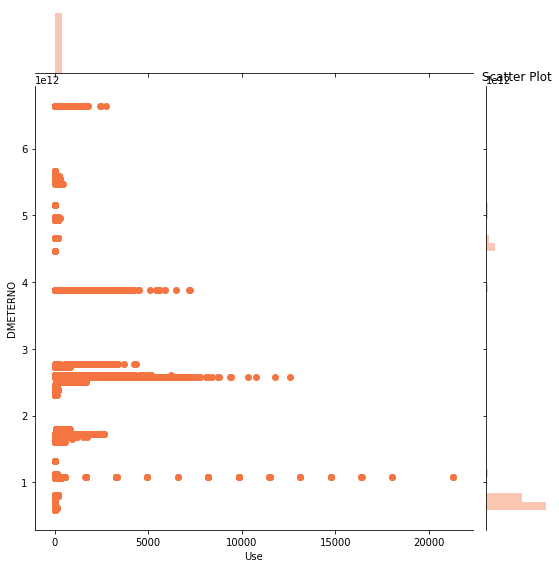

In [14]:
sns.jointplot(x = daily.Use, y = daily.index, data= daily, height=8, ratio=6, color="#f47442")
plt.title('Scatter Plot')

TypeError: ufunc multiply cannot use operands with types dtype('<M8[ns]') and dtype('float64')

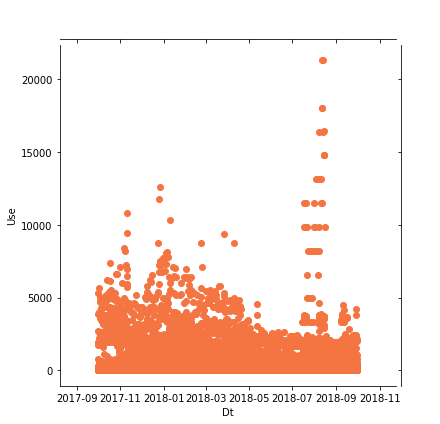

In [18]:
sns.jointplot(x = daily.Dt, y = daily.Use, data= daily, height=6, ratio=10, color="#f47442")
plt.title('Scatter Plot')

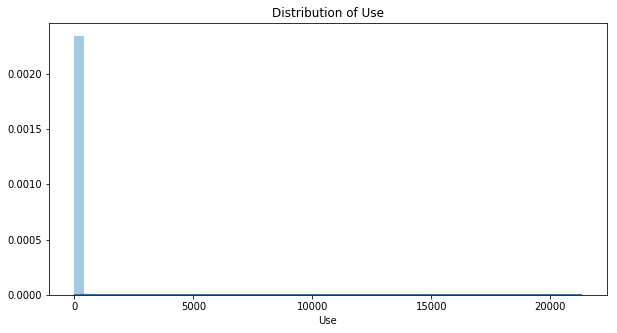

In [21]:
plt.figure(figsize = (10, 5))
sns.distplot(daily['Use']);
plt.title('Distribution of Use');

In [31]:
print(f"There are {len(daily[daily['Use'] < 0])} negative values.")
print(f"There are {len(daily[daily['Use'] == 0])} $0 values.")
print(f"There are {len(daily[(daily['Use']>0) & (daily['Use']<100)])} in between 0~100 values.")
print(f"There are {len(daily[daily['Use'] > 100])} values greater than 100.")

# remove values greater than 100
daily_n = 644260 + 1380858 + 13875
print(f"{100 * len(daily[daily['Use'] == 0])/len(daily)} pct 0 use")
print(f"{100 * len(daily[(daily['Use']>0) & (daily['Use']<100)])/len(daily)} pct 1-100 use")
print(f"{100 * len(daily[daily['Use'] > 100])/len(daily)} pct >100 use")


There are 0 negative values.
There are 644260 $0 values.
There are 1380858 in between 0~100 values.
There are 13875 values greater than 100.
31.596055421833285 pct 0 use
67.72058780256708 pct 1-100 use
0.6804632741097334 pct >100 use


C:\SW\python\Anaconda\install\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\SW\python\Anaconda\install\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


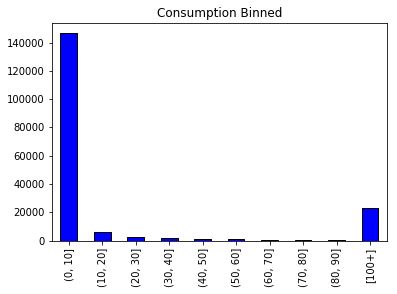

In [8]:
# values less than 100# values less than 100


# Bin the fare and convert to string
daily_feb['consumption-bin'] = pd.cut(daily_feb['DAILY_INTERVAL_USAGE'], bins = list(range(0, 100, 10))).astype(str)

# Uppermost bin
daily_feb.loc[daily_feb['consumption-bin'] == 'nan', 'consumption-bin'] = '[100+]'

# Adjust bin so the sorting is correct
daily_feb.loc[daily_feb['consumption-bin'] == '(5, 10]', 'consumption-bin'] = '(05, 10]'

# Bar plot of value counts
daily_feb['consumption-bin'].value_counts().sort_index().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Consumption Binned');

Text(0.5, 1.0, 'Distribution of Value Greater less 100')

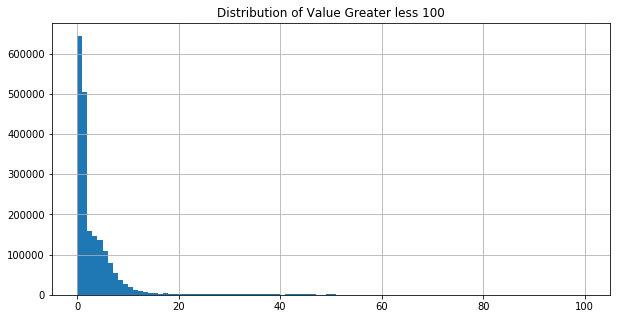

In [32]:
daily[daily.Use<100].Use.hist(bins=100, figsize=(10,5))
plt.title('Distribution of Value Greater less 100')

Text(0.5,1,'Distribution of Value Greater than 100')

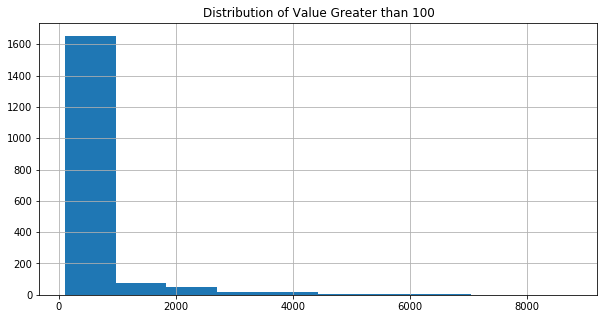

In [10]:
# values less than 100# values greater than 100

daily_feb[daily_feb.DAILY_INTERVAL_USAGE>100].DAILY_INTERVAL_USAGE.hist(bins=10, figsize=(10,5))
plt.title('Distribution of Value Greater than 100')

In [11]:
# Empirical Cumulative Distribution Function Plot

def ecdf(x):
    """Empirical cumulative distribution function of a variable"""
    # Sort in ascending order
    x = np.sort(x)
    n = len(x)
    
    # Go from 1/n to 1
    y = np.arange(1, n + 1, 1) / n
    
    return x, y

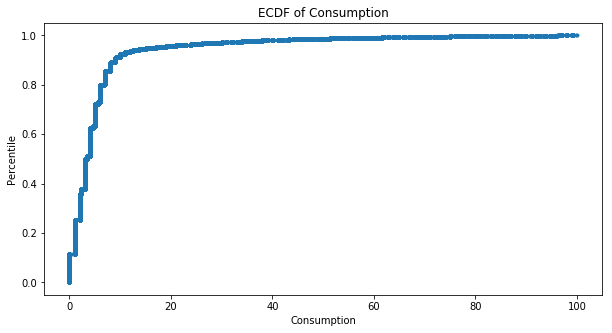

In [12]:
daily_feb_filter = daily_feb[(daily_feb['DAILY_INTERVAL_USAGE']< 100)]

xs, ys = ecdf(daily_feb_filter['DAILY_INTERVAL_USAGE'])
plt.figure(figsize = (10, 5))
plt.plot(xs, ys, '.')
plt.ylabel('Percentile'); plt.title('ECDF of Consumption'); plt.xlabel('Consumption');

In [13]:
hourly_jan = hourly_jan_in.loc[hourly_jan_in['UOM'] == 'CCF']
print(hourly_jan_in.shape)
print(hourly_jan.shape)

hourly_jan = hourly_jan.drop(columns=['DACCOUNTID', 'DMETERNO', 'UOM', 'METERREADDATE', 'INTERVAL_25'])

(484555, 29)
(201203, 29)


In [14]:
hourly_jan.describe()

,INTERVAL_1,INTERVAL_2,INTERVAL_3,INTERVAL_4,INTERVAL_5,INTERVAL_6,INTERVAL_7,INTERVAL_8,INTERVAL_9,INTERVAL_10,...,INTERVAL_15,INTERVAL_16,INTERVAL_17,INTERVAL_18,INTERVAL_19,INTERVAL_20,INTERVAL_21,INTERVAL_22,INTERVAL_23,INTERVAL_24
count,201203.000000,201203.000000,201203.000000,201203.000000,201203.000000,201203.000000,201203.000000,201203.000000,201203.000000,201203.000000,...,201203.000000,201203.000000,201203.000000,201203.000000,201203.000000,201203.000000,201203.000000,201203.000000,201203.000000,201203.000000
mean,0.378335,0.392535,0.405975,0.420260,0.449065,0.495752,0.535257,0.548546,0.528494,0.496079,...,0.608300,0.602880,0.609772,0.623697,0.621981,0.624422,0.628239,0.617672,0.605319,0.591841
std,2.477320,2.504805,2.638916,2.590682,2.641274,2.748192,3.176364,3.007132,3.048991,3.084611,...,8.138534,7.809806,7.565317,7.610587,7.643497,7.668852,7.758741,7.788280,8.695973,8.703930
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,530.000000,550.000000,560.000000,570.000000,560.000000,570.000000,628.000000,600.000000,610.000000,610.000000,...,630.000000,620.000000,620.000000,620.000000,620.000000,630.000000,620.000000,630.000000,1638.380000,1638.380000


In [15]:
mean = pd.DataFrame({'hour':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],
                     'mean_consumption': list(np.mean(hourly_jan))
                    })

mean.describe()
mean.head()

,hour,mean_consumption
0,1,0.378335
1,2,0.392535
2,3,0.405975
3,4,0.420260
4,5,0.449065


Text(0.5,1,'Hourly Consumption Change')

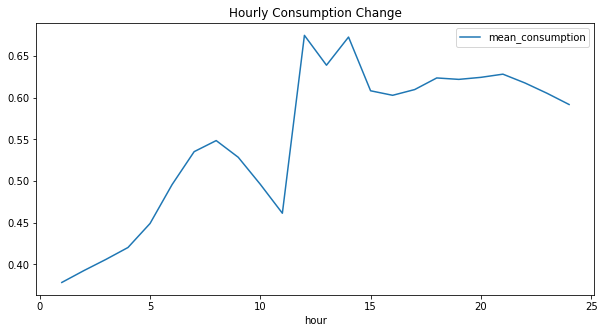

In [16]:
mean.plot(x='hour' , y='mean_consumption', figsize=(10,5))
plt.title('Hourly Consumption Change')

In [17]:
temp = temp_in.drop(columns=['Avg','HighDB','LowDB','AvgHL','Gas Day Average','HDD-HL','CDD-HL','HDD-24','CDD-24'])
humid = humid_in.drop(columns=['Avg','Unnamed: 26','Unnamed: 27','Unnamed: 28'])
wind = wind_in.drop(columns=['Avg','Unnamed: 26'])
cloud = cloud_in.drop(columns=['AvgDaytime','Avg'])


In [18]:
# convert to datetime
temp['Dt'] =  pd.to_datetime(temp['Dt'])
humid['Dt'] =  pd.to_datetime(humid['Dt'])
wind['Dt'] =  pd.to_datetime(wind['Dt'])
cloud['Dt'] =  pd.to_datetime(cloud['Dt'])

In [20]:
temp['year'] = temp['Dt'].dt.year
humid['year'] = humid['Dt'].dt.year
wind['year'] = wind['Dt'].dt.year
cloud['year'] = cloud['Dt'].dt.year

In [21]:
temp_2017 = temp[temp['year']== 2017]
humid_2017 = humid[humid['year']== 2017] 
wind_2017 = wind[wind['year']== 2017] 
cloud_2017 = cloud[cloud['year']== 2017] 


In [33]:
list(daily)

['DACCOUNTID',
 'DMETERNO',
 'Dt',
 'Use',
 'AvgTemp',
 'HighDB',
 'LowDB',
 'AvgHumid',
 'AvgWind',
 'AvgDaytimeCloud',
 'AvgCloud',
 'Friday',
 'Monday',
 'Saturday',
 'Sunday',
 'Thursday',
 'Tuesday',
 'Wednesday',
 'Holiday']

Text(0.5, 1.0, 'Temperature Change Across Year')

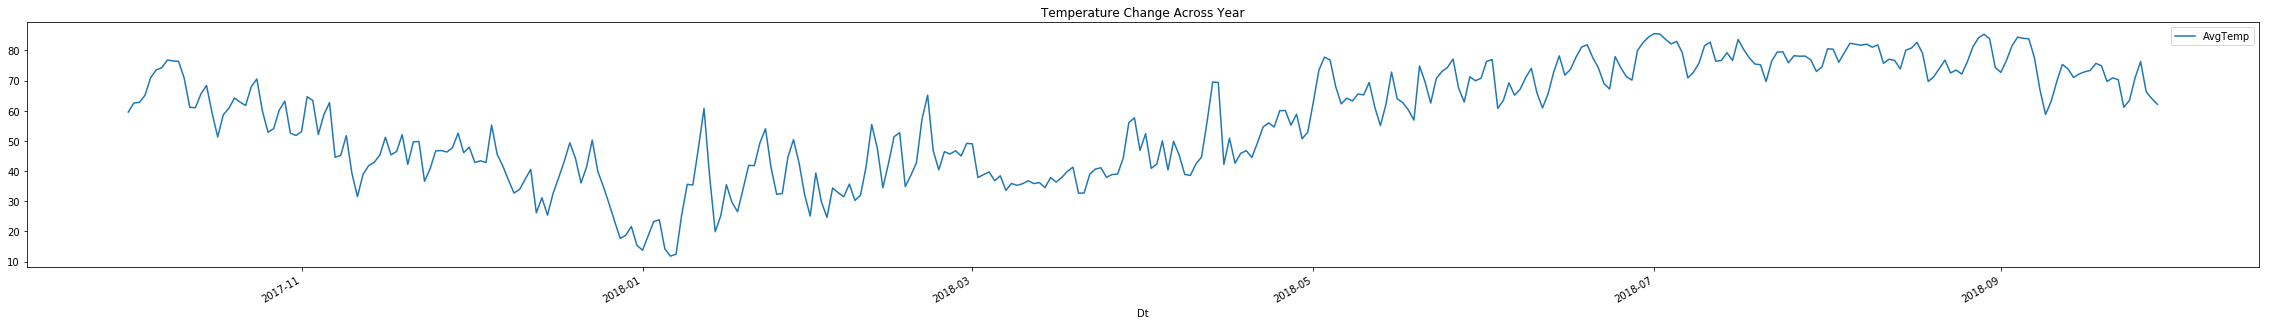

In [39]:
daily.plot(x='Dt' , y='AvgTemp', figsize=(40,5))
plt.title('Temperature Change Across Year')

Text(0.5, 1.0, 'Humidity Change Across Year')

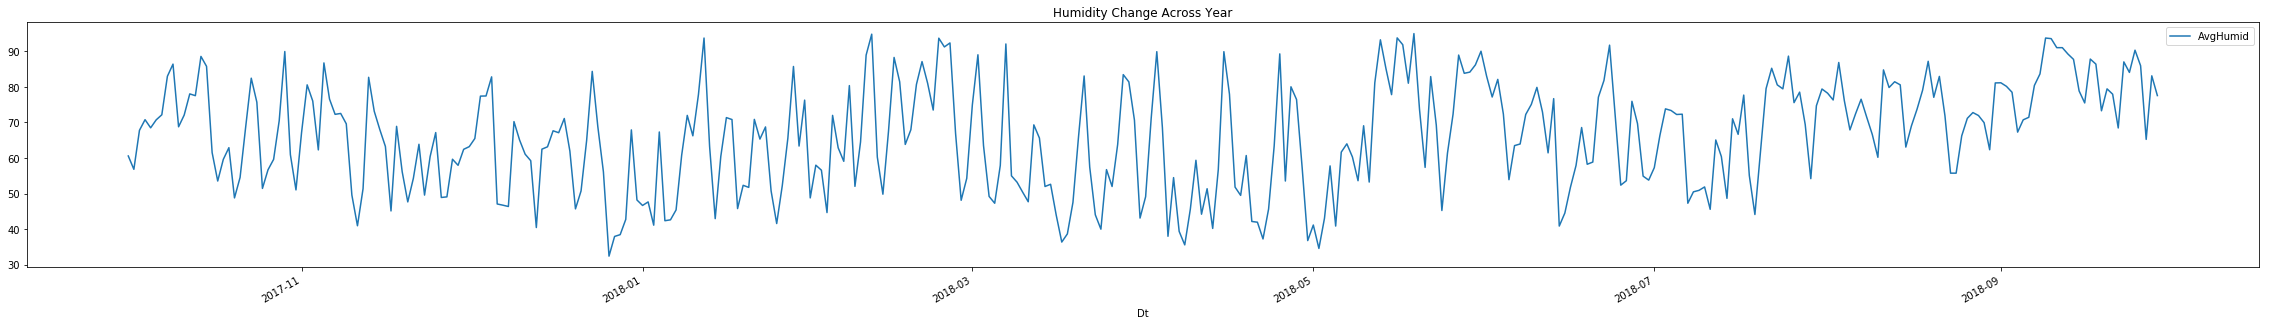

In [40]:
daily.plot(x='Dt' , y='AvgHumid', figsize=(40,5))
plt.title('Humidity Change Across Year')

Text(0.5, 1.0, 'Wind Change Across Year')

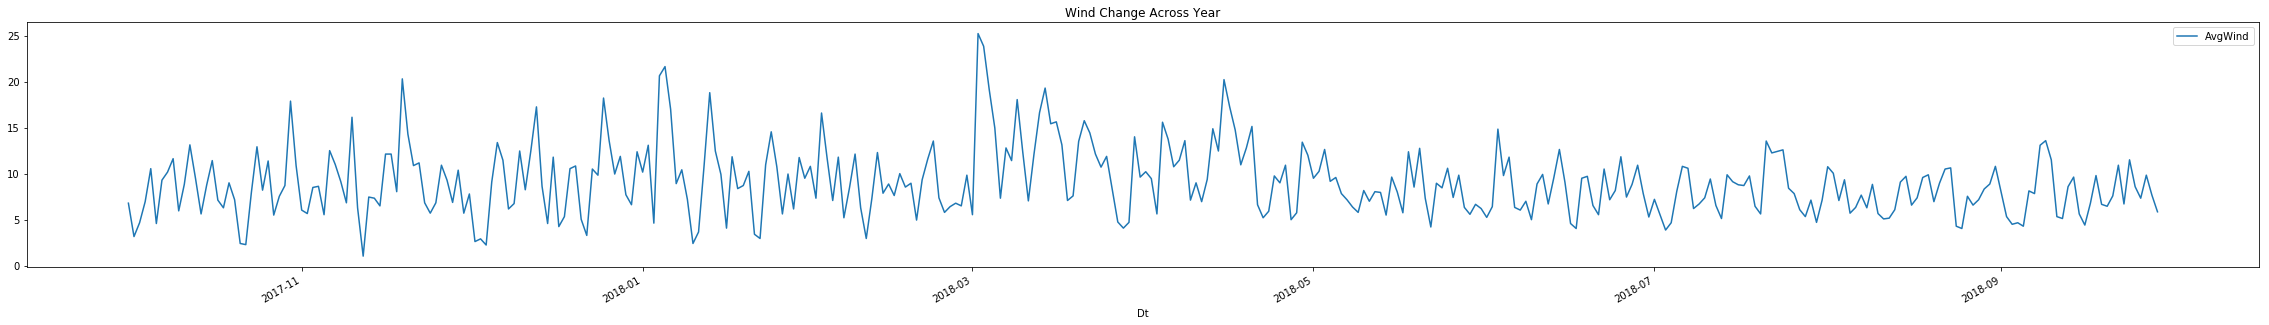

In [41]:
daily.plot(x='Dt' , y='AvgWind', figsize=(40,5))
plt.title('Wind Change Across Year')

Text(0.5, 1.0, 'Cloud Cover Change Across Year')

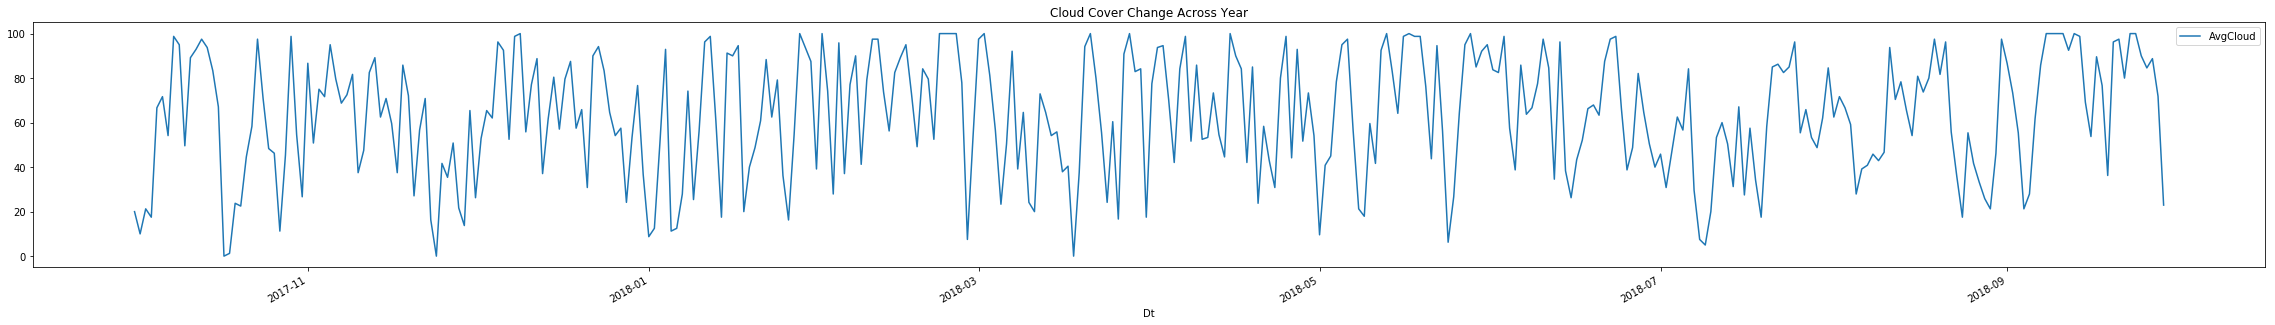

In [42]:
daily.plot(x='Dt' , y='AvgCloud', figsize=(40,5))
plt.title('Cloud Cover Change Across Year')